<class 'imageio.core.util.Array'>
(80, 170, 4)


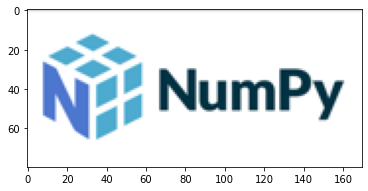

In [43]:
import scipy.misc
from scipy import misc
import imageio

img=imageio.imread('img.png')

print(type(img))
print(img.shape)

import matplotlib.pyplot as plt
plt.imshow(img)

In [44]:
print(img.shape)

print(img.ndim)

print(img[:, :, 0])
print(img[:, :, 1])
print(img[:, :, 2])
print(img[:, :, 3])

(80, 170, 4)
3
[[204 204 204 ... 204 204 204]
 [248 248 248 ... 248 248 248]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[204 204 204 ... 204 204 204]
 [248 248 248 ... 248 248 248]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[204 204 204 ... 204 204 204]
 [248 248 248 ... 248 248 248]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


(80, 170)
1.0 0.0


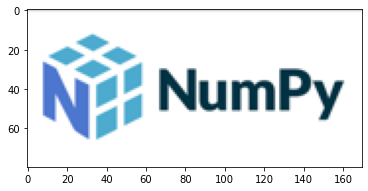

In [54]:
print(img[:, :, 0].shape)

img_array = img / 255
img_array=img_array[:,:,0:3]
plt.imshow(img_array)

print(img_array.max(), img_array.min())

red_array = img_array[:, :, 0]
green_array = img_array[:, :, 1]
blue_array = img_array[:, :, 2]

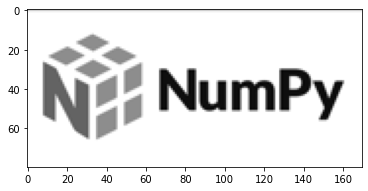

In [46]:
# 灰度图像
from numpy import linalg
img_gray = img_array @ [0.2126, 0.7152, 0.0722]
img_gray.shape

plt.imshow(img_gray, cmap="gray")

In [47]:
# SVD操作

U, s, Vt = linalg.svd(img_gray)
print(U.shape, s.shape, Vt.shape)

(80, 80) (80,) (170, 170)


In [48]:
# 重建
import numpy as np
Sigma = np.zeros((80, 170))
for i in range(80):
    Sigma[i, i] = s[i]

print(linalg.norm(img_gray - U @ Sigma @ Vt))

print(np.allclose(img_gray, U @ Sigma @ Vt))

4.75362211282541e-13
True


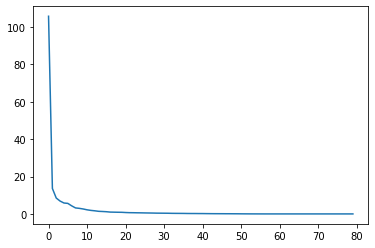

In [49]:
plt.plot(s)

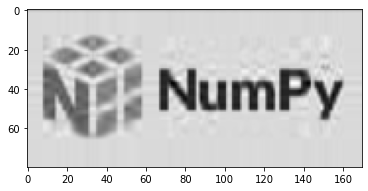

In [50]:
k = 10
approx = U @ Sigma[:, :k] @ Vt[:k, :]
plt.imshow(approx, cmap="gray")

In [51]:
print(img_array.shape)

img_array_transposed = np.transpose(img_array, (2, 0, 1))
print(img_array_transposed.shape)

U, s, Vt = linalg.svd(img_array_transposed)
print(U.shape, s.shape, Vt.shape)

(80, 170, 3)
(3, 80, 170)
(3, 80, 80) (3, 80) (3, 170, 170)


(3, 80, 170)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


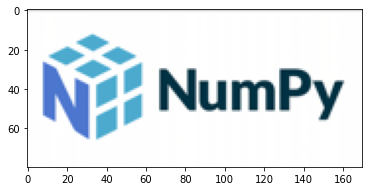

In [52]:
Sigma = np.zeros((3, 80, 170))

for j in range(3):
    np.fill_diagonal(Sigma[j, :, :], s[j, :])

reconstructed = U @ Sigma @ Vt
print(reconstructed.shape)

plt.imshow(np.transpose(reconstructed, (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 80, 170)


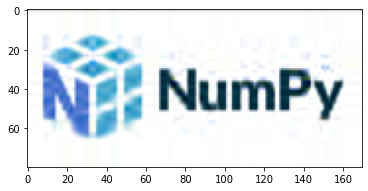

In [53]:
approx_img = U @ Sigma[..., :k] @ Vt[..., :k, :]
print(approx_img.shape)
plt.imshow(np.transpose(approx_img, (1, 2, 0)))












